In [19]:
from parsing import Parser
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
conn = psycopg2.connect(host="localhost", dbname='postgres', user='postgres', password='123456', port=5432)
cur = conn.cursor()

length = 400
start = 16

maps = []
dataset = []

query = """
        SELECT dataset.map_name
        FROM dataset
        """
cur.execute(query)
for row in cur.fetchall():
    maps.append(row[0])

for index in range(length):
    query = f"""
            SELECT dataset.t1_winstreak,dataset.t2_winstreak,dataset.t1_h2h,dataset.t2_h2h,
                            dataset.t1_ranking,dataset.t2_ranking,dataset.t1_weeks,dataset.t2_weeks,dataset.t1_age,dataset.t2_age,dataset.t1_rating,dataset.t2_rating,
                            dataset.t1_winrate,dataset.t2_winrate,dataset.t1_5v4,dataset.t2_5v4,dataset.t1_4v5,dataset.t2_4v5,dataset.t1_maps,dataset.t2_maps,  
                            dataset.t1_pistol,dataset.t2_pistol,win,betting_info.rounds_lost_{maps[index]}, betting_info.rounds_won_{maps[index]}, betting_info.fp_{maps[index]}, betting_info.fp_percent_{maps[index]}
            FROM dataset
            FULL OUTER JOIN betting_info ON dataset.t1_name = betting_info.team
            WHERE dataset.id = {start+index}
            """
    cur.execute(query)
    row = cur.fetchall()[0]
    query = f"""
            SELECT betting_info.rounds_lost_{maps[index]}, betting_info.rounds_won_{maps[index]}, betting_info.fp_{maps[index]}, betting_info.fp_percent_{maps[index]}
            FROM dataset
            FULL OUTER JOIN betting_info ON dataset.t2_name = betting_info.team
            WHERE dataset.id = {start+index}
            """
    cur.execute(query)
    row += cur.fetchall()[0]

    if start+index < 73:

        query = f"""
                SELECT blast_fall_groups2023_rating.team_rating, blast_fall_groups2023_rating.event_rating
                FROM dataset
                FULL OUTER JOIN blast_fall_groups2023_rating ON dataset.t1_name = blast_fall_groups2023_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT blast_fall_groups2023_rating.team_rating, blast_fall_groups2023_rating.event_rating
                FROM dataset
                FULL OUTER JOIN blast_fall_groups2023_rating ON dataset.t2_name = blast_fall_groups2023_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 73 and start+index < 147:

        query = f"""
                SELECT iem_cologne2023_rating.team_rating, iem_cologne2023_rating.event_rating
                FROM dataset
                FULL OUTER JOIN iem_cologne2023_rating ON dataset.t1_name = iem_cologne2023_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT iem_cologne2023_rating.team_rating, iem_cologne2023_rating.event_rating
                FROM dataset
                FULL OUTER JOIN iem_cologne2023_rating ON dataset.t2_name = iem_cologne2023_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 147 and start+index < 184:

        query = f"""
                SELECT gamers8_rating.team_rating, gamers8_rating.event_rating
                FROM dataset
                FULL OUTER JOIN gamers8_rating ON dataset.t1_name = gamers8_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT gamers8_rating.team_rating, gamers8_rating.event_rating
                FROM dataset
                FULL OUTER JOIN gamers8_rating ON dataset.t2_name = gamers8_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 184 and start+index < 214:

        query = f"""
                SELECT dunav_rating.team_rating, dunav_rating.event_rating
                FROM dataset
                FULL OUTER JOIN dunav_rating ON dataset.t1_name = dunav_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT dunav_rating.team_rating, dunav_rating.event_rating
                FROM dataset
                FULL OUTER JOIN dunav_rating ON dataset.t2_name = dunav_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 214 and start+index < 289:

        query = f"""
                SELECT cct_online_rating.team_rating, cct_online_rating.event_rating
                FROM dataset
                FULL OUTER JOIN cct_online_rating ON dataset.t1_name = cct_online_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT cct_online_rating.team_rating, cct_online_rating.event_rating
                FROM dataset
                FULL OUTER JOIN cct_online_rating ON dataset.t2_name = cct_online_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 289 and start+index < 401:

        query = f"""
                SELECT cct_north_rating.team_rating, cct_north_rating.event_rating
                FROM dataset
                FULL OUTER JOIN cct_north_rating ON dataset.t1_name = cct_north_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT cct_north_rating.team_rating, cct_north_rating.event_rating
                FROM dataset
                FULL OUTER JOIN cct_north_rating ON dataset.t2_name = cct_north_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]

    elif start+index >= 401:

        query = f"""
                SELECT iem_sydney_rating.team_rating, iem_sydney_rating.event_rating
                FROM dataset
                FULL OUTER JOIN iem_sydney_rating ON dataset.t1_name = iem_sydney_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]
        query = f"""
                SELECT iem_sydney_rating.team_rating, iem_sydney_rating.event_rating
                FROM dataset
                FULL OUTER JOIN iem_sydney_rating ON dataset.t2_name = iem_sydney_rating.team
                WHERE dataset.id = {start+index}
                """
        cur.execute(query)
        row += cur.fetchall()[0]


    dataset.append(row)
conn.close()

In [3]:
df = pd.DataFrame(dataset, columns=["t1_winstreak","t2_winstreak","t1_h2h","t2_h2h",
                            "t1_ranking","t2_ranking","t1_weeks","t2_weeks","t1_age","t2_age","t1_rating","t2_rating",
                            "t1_winrate","t2_winrate","t1_5v4","t2_5v4","t1_4v5","t2_4v5","t1_maps","t2_maps",  
                            "t1_pistol","t2_pistol","win","t1_rounds_lost", "t1_rounds_won", "t1_fp", "t1_fp_percent",
                            "t2_rounds_lost", "t2_rounds_won", "t2_fp", "t2_fp_percent","t1_team_rating","t1_event_rating",
                            "t2_team_rating","t2_event_rating"])
df.head()

,t1_winstreak,t2_winstreak,t1_h2h,t2_h2h,t1_ranking,t2_ranking,t1_weeks,t2_weeks,t1_age,t2_age,t1_rating,t2_rating,t1_winrate,t2_winrate,t1_5v4,t2_5v4,t1_4v5,t2_4v5,t1_maps,t2_maps,t1_pistol,t2_pistol,win,t1_rounds_lost,t1_rounds_won,t1_fp,t1_fp_percent,t2_rounds_lost,t2_rounds_won,t2_fp,t2_fp_percent,t1_team_rating,t1_event_rating,t2_team_rating,t2_event_rating
0,0.0,0.0,0.0,0.0,9.0,4.0,6.0,83.0,24.2,25.7,5.11,5.42,0.600,0.562,0.662,0.756,0.281,0.298,5.0,16.0,0.500,0.656,True,14.00,10.50,False,0.07,8.50,11.33,True,0.61,1.04,5.20,1.03,5.16
1,0.0,0.0,0.0,0.0,9.0,4.0,6.0,83.0,24.2,25.7,5.11,5.42,0.571,0.500,0.689,0.764,0.264,0.282,7.0,10.0,0.714,0.350,True,11.75,7.33,True,0.29,10.50,11.50,False,0.10,1.04,5.20,1.03,5.16
2,0.0,0.0,0.0,1.0,1.0,24.0,85.0,16.0,24.4,23.4,5.49,5.24,0.667,0.333,0.734,0.703,0.293,0.243,9.0,3.0,0.500,0.333,True,13.00,11.00,False,0.24,7.00,9.50,False,0.15,1.16,5.82,0.97,4.85
3,0.0,0.0,0.0,1.0,1.0,24.0,85.0,16.0,24.4,23.4,5.49,5.24,0.800,0.500,0.803,0.661,0.336,0.220,10.0,4.0,0.500,0.750,True,9.14,9.00,False,0.14,13.00,8.00,False,0.15,1.16,5.82,0.97,4.85
4,0.0,0.0,2.0,1.0,13.0,6.0,54.0,35.0,23.2,23.5,5.06,5.41,0.200,0.615,0.727,0.780,0.205,0.273,5.0,13.0,0.700,0.423,False,9.00,10.00,False,0.16,8.43,10.20,False,0.28,0.99,4.96,1.12,5.61


In [4]:
df.describe()

,t1_winstreak,t2_winstreak,t1_h2h,t2_h2h,t1_ranking,t2_ranking,t1_weeks,t2_weeks,t1_age,t2_age,t1_rating,t2_rating,t1_winrate,t2_winrate,t1_5v4,t2_5v4,t1_4v5,t2_4v5,t1_maps,t2_maps,t1_pistol,t2_pistol,t1_rounds_lost,t1_rounds_won,t1_fp_percent,t2_rounds_lost,t2_rounds_won,t2_fp_percent,t1_team_rating,t1_event_rating,t2_team_rating,t2_event_rating
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,268.000000,268.000000,268.000000,265.000000,265.000000,265.000000,400.000000,400.000000,400.000000,400.000000
mean,0.922500,0.837500,1.732500,1.37250,24.550000,34.040000,44.877500,32.902500,24.042000,23.611750,5.303025,5.200075,0.563078,0.521918,0.729175,0.717800,0.298268,0.288328,9.625000,9.302500,0.498440,0.513025,10.392276,10.433806,0.185485,10.475849,10.180604,0.189208,1.043850,5.352200,1.016725,5.175700
std,1.992843,1.906615,2.944081,2.47367,22.519554,30.925789,49.580521,43.327198,1.663341,1.802668,0.216144,0.275409,0.193000,0.209260,0.059591,0.064269,0.053438,0.054236,5.433524,5.458983,0.131048,0.152608,2.900438,3.221304,0.156064,3.259713,3.116039,0.172534,0.073622,0.521181,0.072906,0.482763
min,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,19.900000,19.200000,4.350000,4.270000,0.000000,0.000000,0.286000,0.263000,0.120000,0.083000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,4.020000,0.840000,4.220000
25%,0.000000,0.000000,0.000000,0.00000,8.000000,11.000000,3.000000,0.000000,22.850000,22.700000,5.220000,5.100000,0.444000,0.400000,0.697750,0.686000,0.268000,0.256000,6.000000,5.000000,0.429000,0.438000,8.500000,9.475000,0.060000,9.000000,9.000000,0.050000,0.990000,4.970000,0.960000,4.810000
50%,0.000000,0.000000,0.000000,0.00000,20.000000,24.000000,25.000000,16.000000,24.100000,23.500000,5.290000,5.230000,0.571000,0.500000,0.730000,0.724500,0.293000,0.288000,9.000000,8.000000,0.500000,0.500000,10.355000,11.000000,0.150000,10.500000,10.500000,0.150000,1.050000,5.370000,1.020000,5.160000
75%,0.000000,0.000000,2.000000,2.00000,34.000000,50.000000,77.000000,64.000000,25.500000,25.200000,5.420000,5.410000,0.700000,0.667000,0.763250,0.762000,0.331000,0.323000,12.000000,12.000000,0.583000,0.602750,12.050000,12.000000,0.242500,11.800000,11.670000,0.290000,1.090000,5.640000,1.080000,5.462500
max,9.000000,9.000000,17.000000,14.00000,154.000000,155.000000,175.000000,240.000000,27.400000,27.400000,5.710000,5.710000,1.000000,1.000000,0.871000,0.871000,0.500000,0.446000,28.000000,28.000000,1.000000,1.000000,20.000000,18.000000,0.670000,20.000000,17.000000,0.670000,1.180000,6.770000,1.180000,6.770000


In [5]:
df.isnull().sum()

t1_winstreak         0
t2_winstreak         0
t1_h2h               0
t2_h2h               0
t1_ranking           0
t2_ranking           0
t1_weeks             0
t2_weeks             0
t1_age               0
t2_age               0
t1_rating            0
t2_rating            0
t1_winrate           0
t2_winrate           0
t1_5v4               0
t2_5v4               0
t1_4v5               0
t2_4v5               0
t1_maps              0
t2_maps              0
t1_pistol            0
t2_pistol            0
win                  0
t1_rounds_lost     132
t1_rounds_won      132
t1_fp              132
t1_fp_percent      132
t2_rounds_lost     135
t2_rounds_won      135
t2_fp              135
t2_fp_percent      135
t1_team_rating       0
t1_event_rating      0
t2_team_rating       0
t2_event_rating      0
dtype: int64

In [6]:
df.dropna(subset=['t1_rounds_lost', 't2_rounds_lost'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 394
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   t1_winstreak     209 non-null    float64
 1   t2_winstreak     209 non-null    float64
 2   t1_h2h           209 non-null    float64
 3   t2_h2h           209 non-null    float64
 4   t1_ranking       209 non-null    float64
 5   t2_ranking       209 non-null    float64
 6   t1_weeks         209 non-null    float64
 7   t2_weeks         209 non-null    float64
 8   t1_age           209 non-null    float64
 9   t2_age           209 non-null    float64
 10  t1_rating        209 non-null    float64
 11  t2_rating        209 non-null    float64
 12  t1_winrate       209 non-null    float64
 13  t2_winrate       209 non-null    float64
 14  t1_5v4           209 non-null    float64
 15  t2_5v4           209 non-null    float64
 16  t1_4v5           209 non-null    float64
 17  t2_4v5           209 

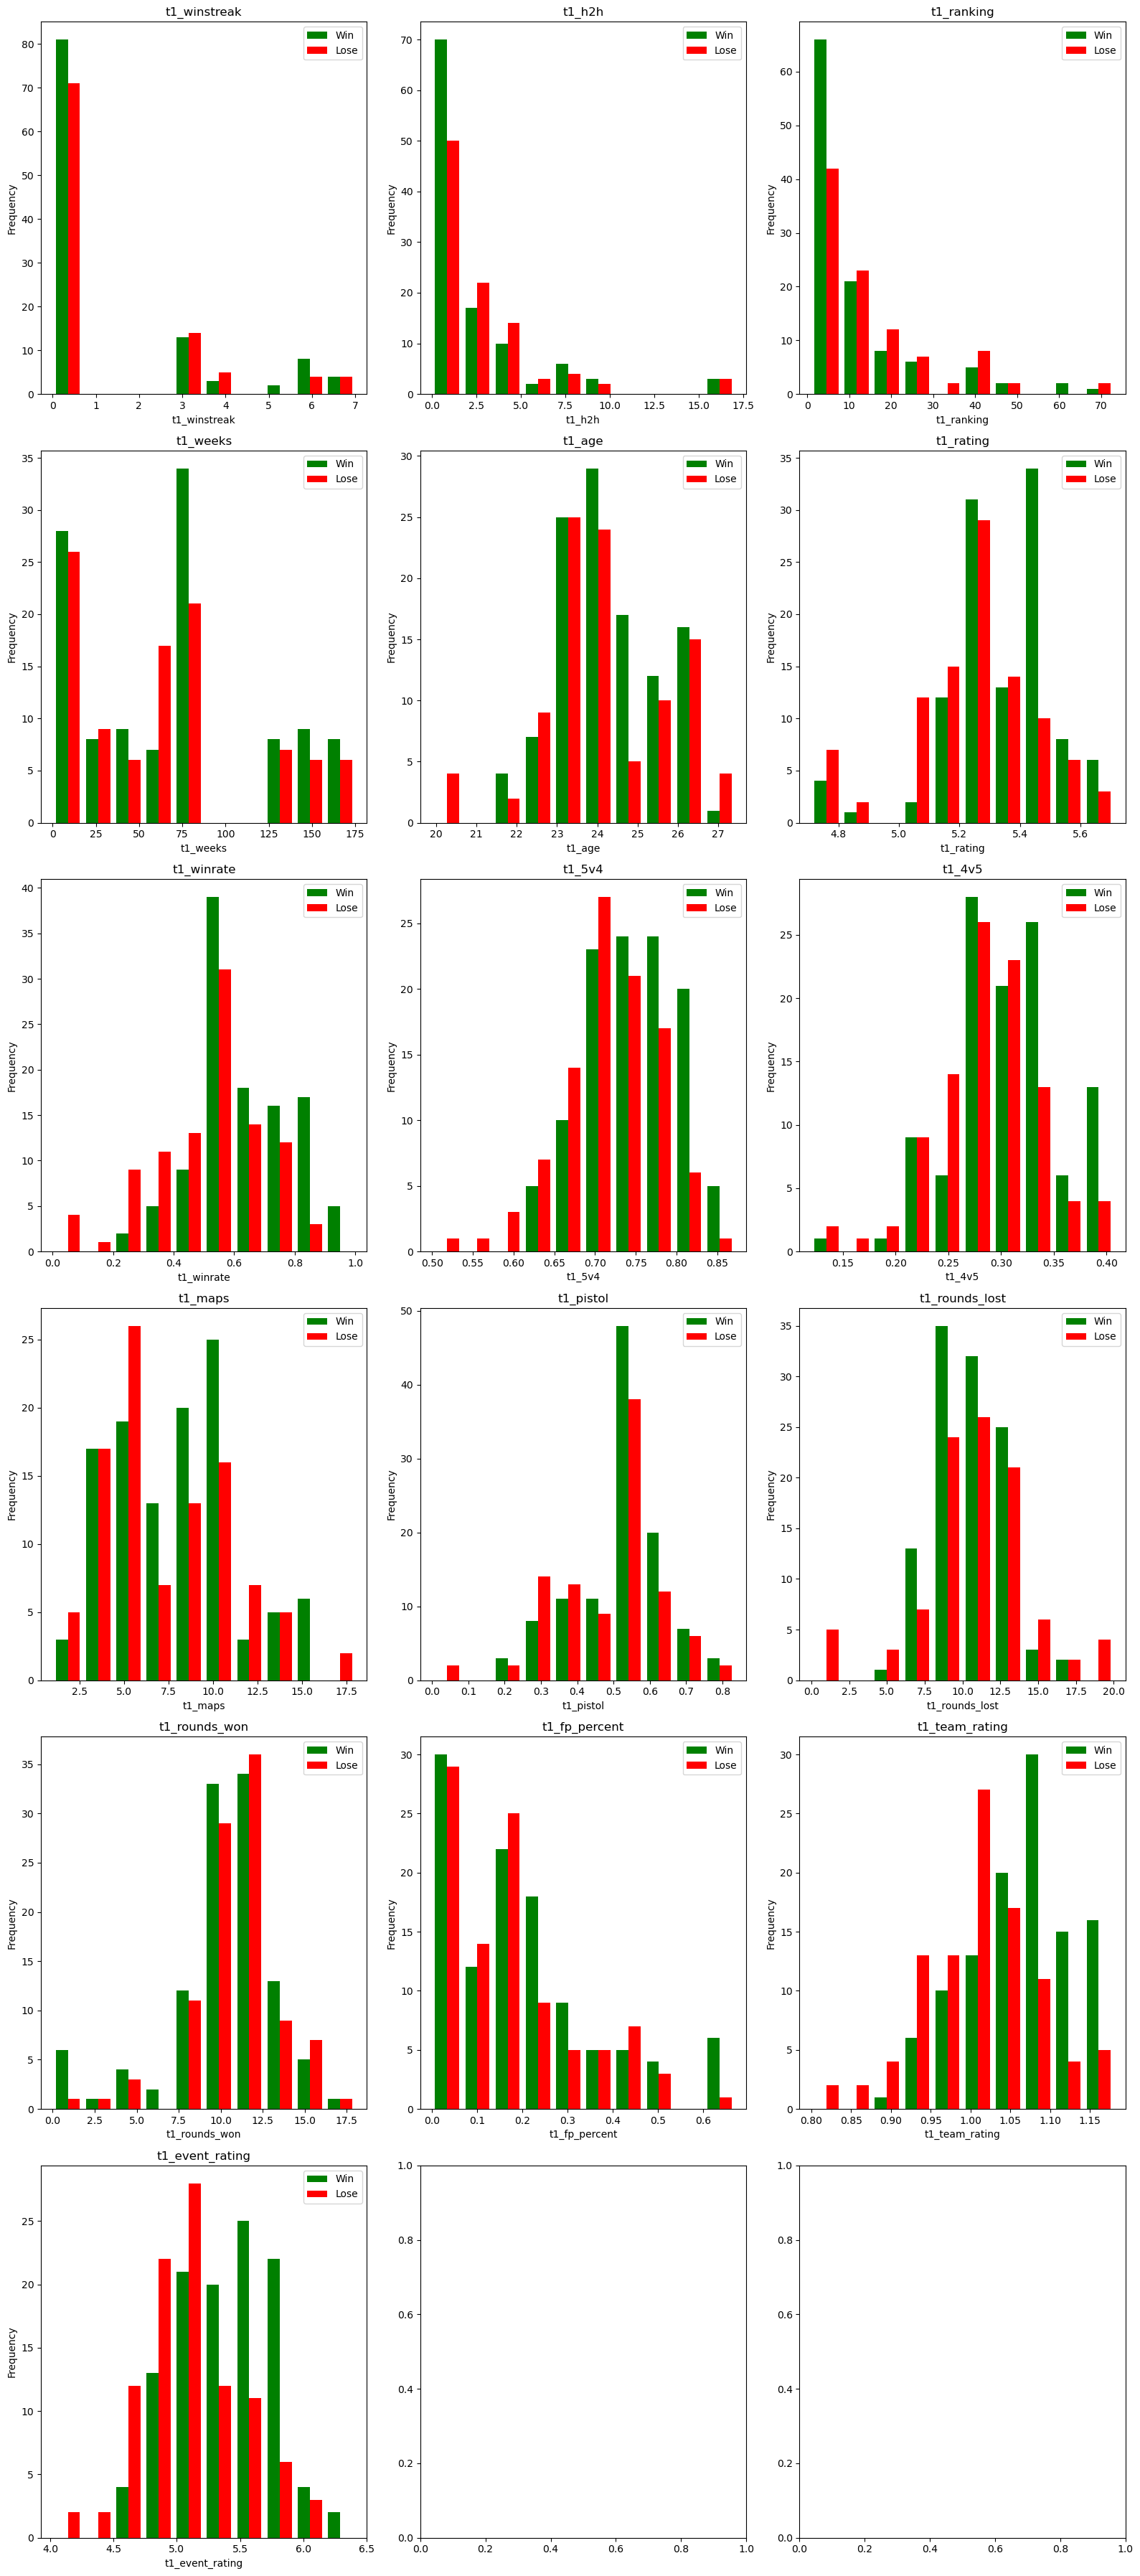

In [8]:
data_columns = [col for col in df.columns if col != 'win' and col != 't1_fp' and col != 't2_fp' and 't1' in col]

# Define the number of rows and columns for subplots
num_cols = 3
num_rows = len(data_columns)//num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))

index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        if index < len(data_columns):
            axes[row,col].hist(x = [df[df['win']==1][data_columns[index]], df[df['win']==0][data_columns[index]]], 
            stacked=False, color = ['g','r'],label = ['Win','Lose'])
            axes[row,col].set_title(f'{data_columns[index]}')
            axes[row,col].set_xlabel(data_columns[index])
            axes[row,col].set_ylabel('Frequency')
            axes[row,col].legend(['Win', 'Lose'])
            index += 1

plt.tight_layout()
plt.show()

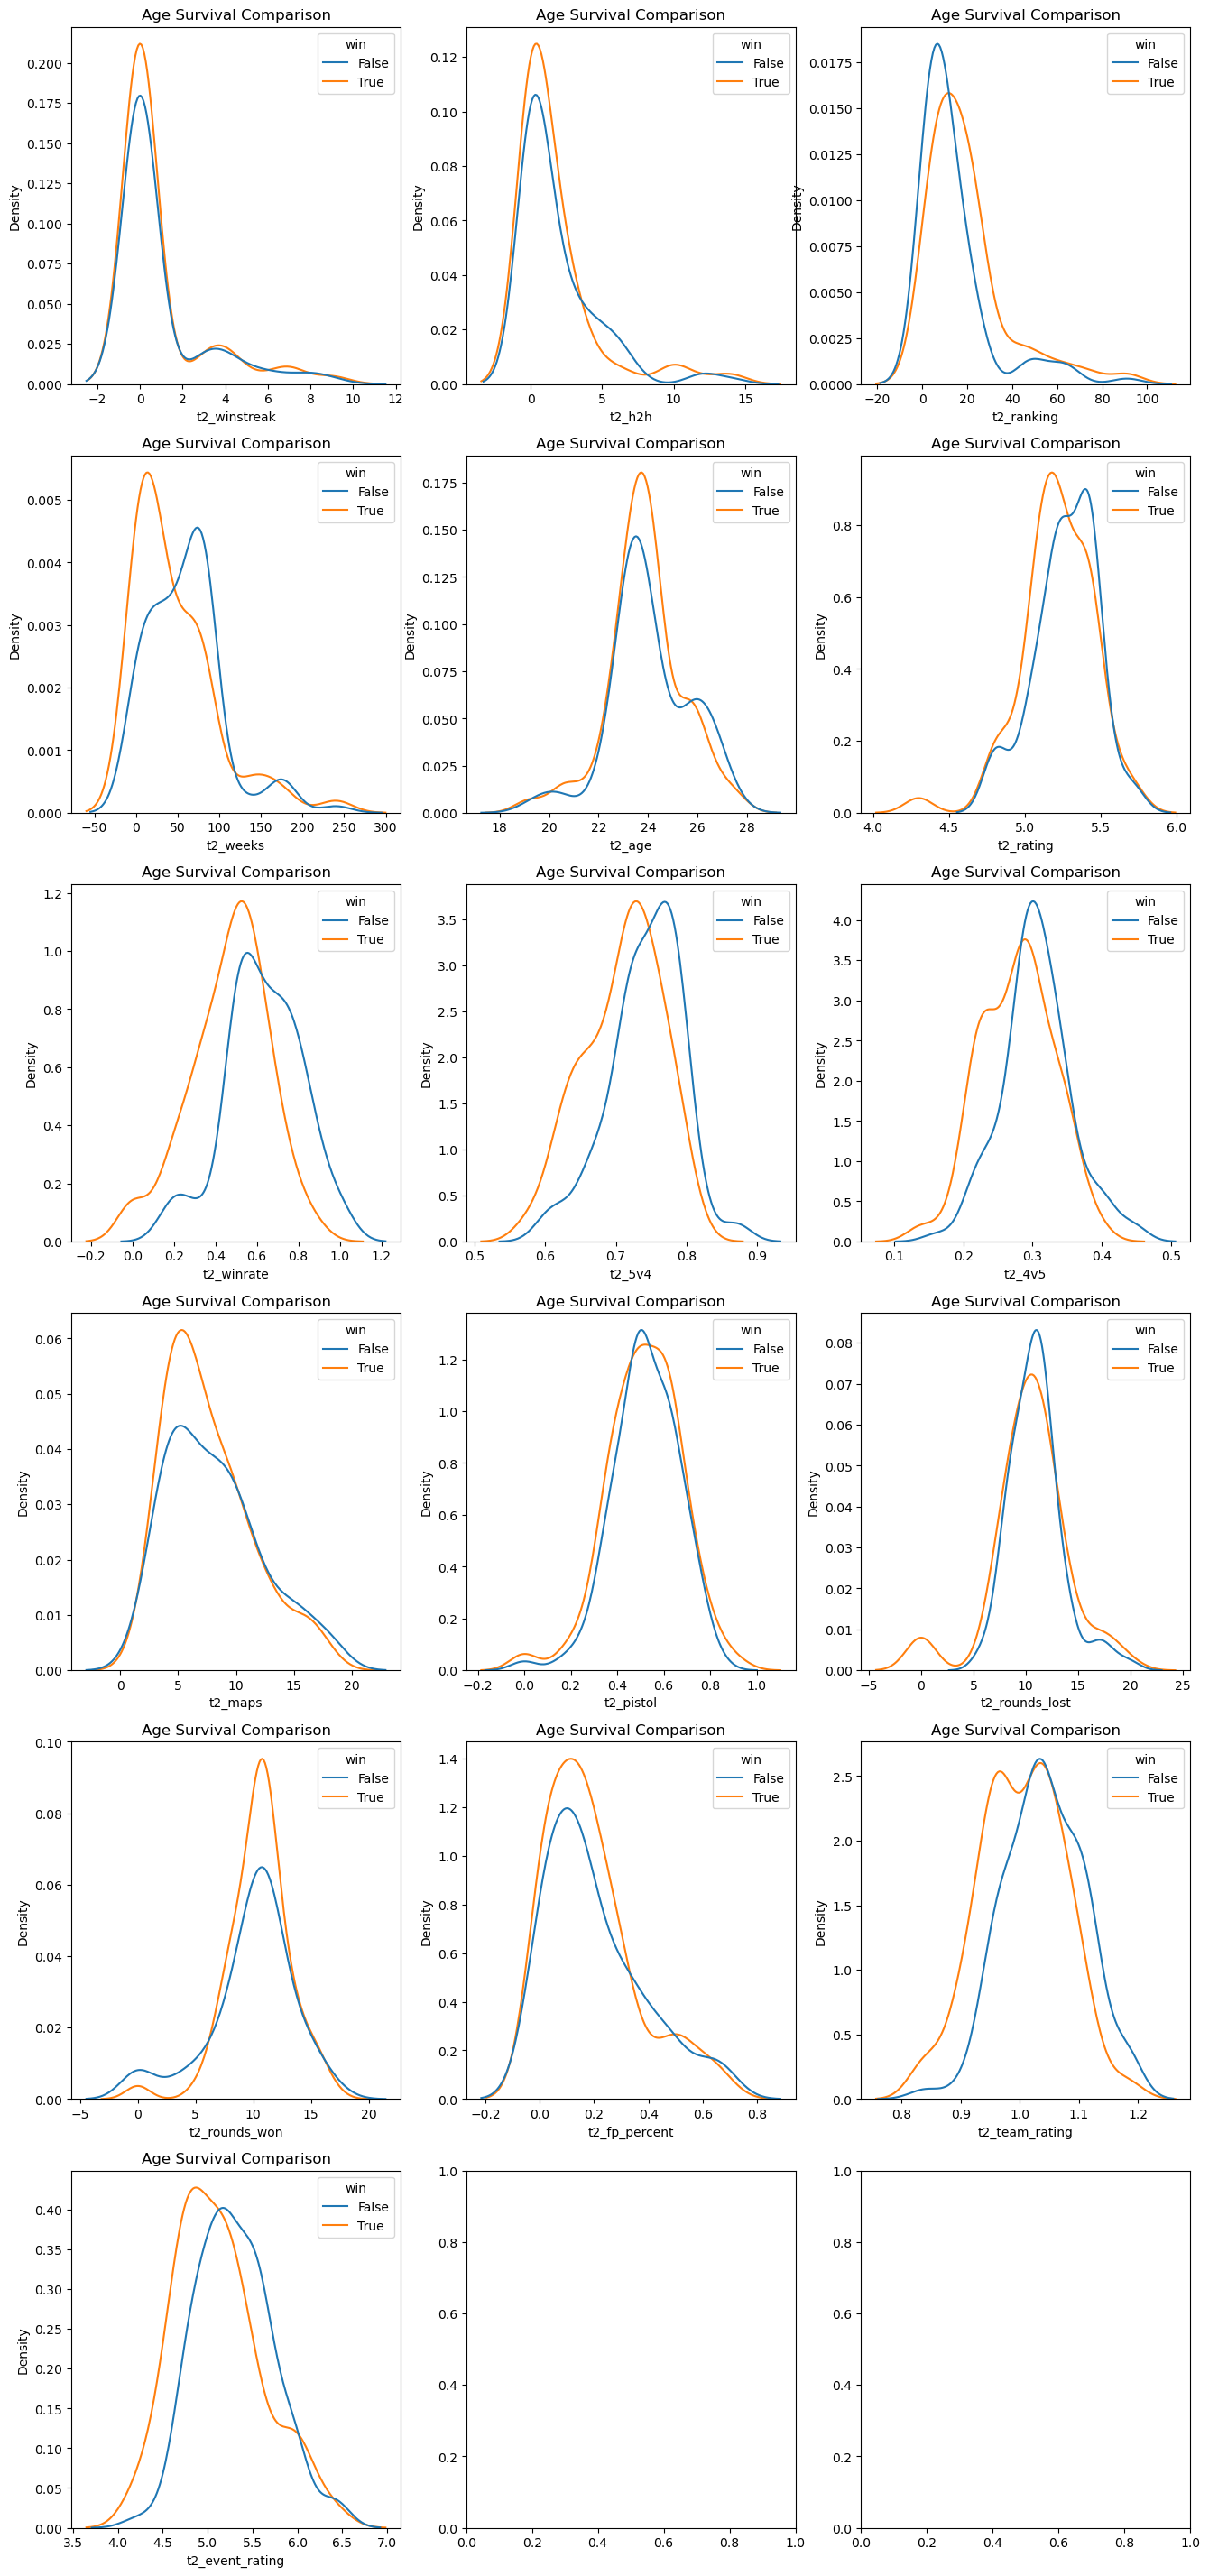

In [9]:
# fig, axes = plt.subplots(2,3,figsize=(14,12))

# sns.kdeplot(x = 'Age', hue='Transported' ,data = train, ax = axes[0,0])
# axes[0,0].set_title('Age Survival Comparison')

data_columns = [col for col in df.columns if col != 'win' and col != 't1_fp' and col != 't2_fp' and 't2' in col]

# Define the number of rows and columns for subplots
num_cols = 3
num_rows = len(data_columns)//num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))

index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        if index < len(data_columns):
            sns.kdeplot(x = data_columns[index], hue='win', data = df, ax = axes[row,col])
            axes[row,col].set_title('Age Survival Comparison')
            index += 1

In [24]:
data_columns = [col for col in df.columns if col != 'win' and col != 't1_fp' and col != 't2_fp']
data_columns[:22]
da = pd.DataFrame()

for index in range(0,22,2):
    da[data_columns[index][3:]] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+1]]
for index in range(22,25):
    da[data_columns[index][3:]] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+3]]
for index in range(28,30):
    da[data_columns[index][3:]] = df.loc[:,data_columns[index]]-df.loc[:,data_columns[index+2]]
da['win'] = df.loc[:,'win']
    
da.head

<bound method NDFrame.head of      winstreak  h2h  ranking  weeks  age  rating  winrate    5v4    4v5  maps   
0          0.0  0.0      5.0  -77.0 -1.5   -0.31    0.038 -0.094 -0.017 -11.0  \
1          0.0  0.0      5.0  -77.0 -1.5   -0.31    0.071 -0.075 -0.018  -3.0   
2          0.0 -1.0    -23.0   69.0  1.0    0.25    0.334  0.031  0.050   6.0   
3          0.0 -1.0    -23.0   69.0  1.0    0.25    0.300  0.142  0.116   6.0   
4          0.0  1.0      7.0   19.0 -0.3   -0.35   -0.415 -0.053 -0.068  -8.0   
5          0.0  1.0      7.0   19.0 -0.3   -0.35   -0.167 -0.087 -0.057  -5.0   
6          0.0  0.0     36.0  -83.0 -3.0   -0.28   -0.062 -0.011 -0.020 -10.0   
7          0.0  0.0     36.0  -83.0 -3.0   -0.28    0.429  0.133  0.000  -4.0   
8          0.0  0.0     36.0  -83.0 -3.0   -0.28   -0.250 -0.086 -0.068  -6.0   
9          0.0  0.0     -1.0  -12.0  0.6   -0.18    0.357  0.118  0.013   1.0   
10         0.0  0.0     -1.0  -12.0  0.6   -0.18   -0.171 -0.080  0.081   2.0  

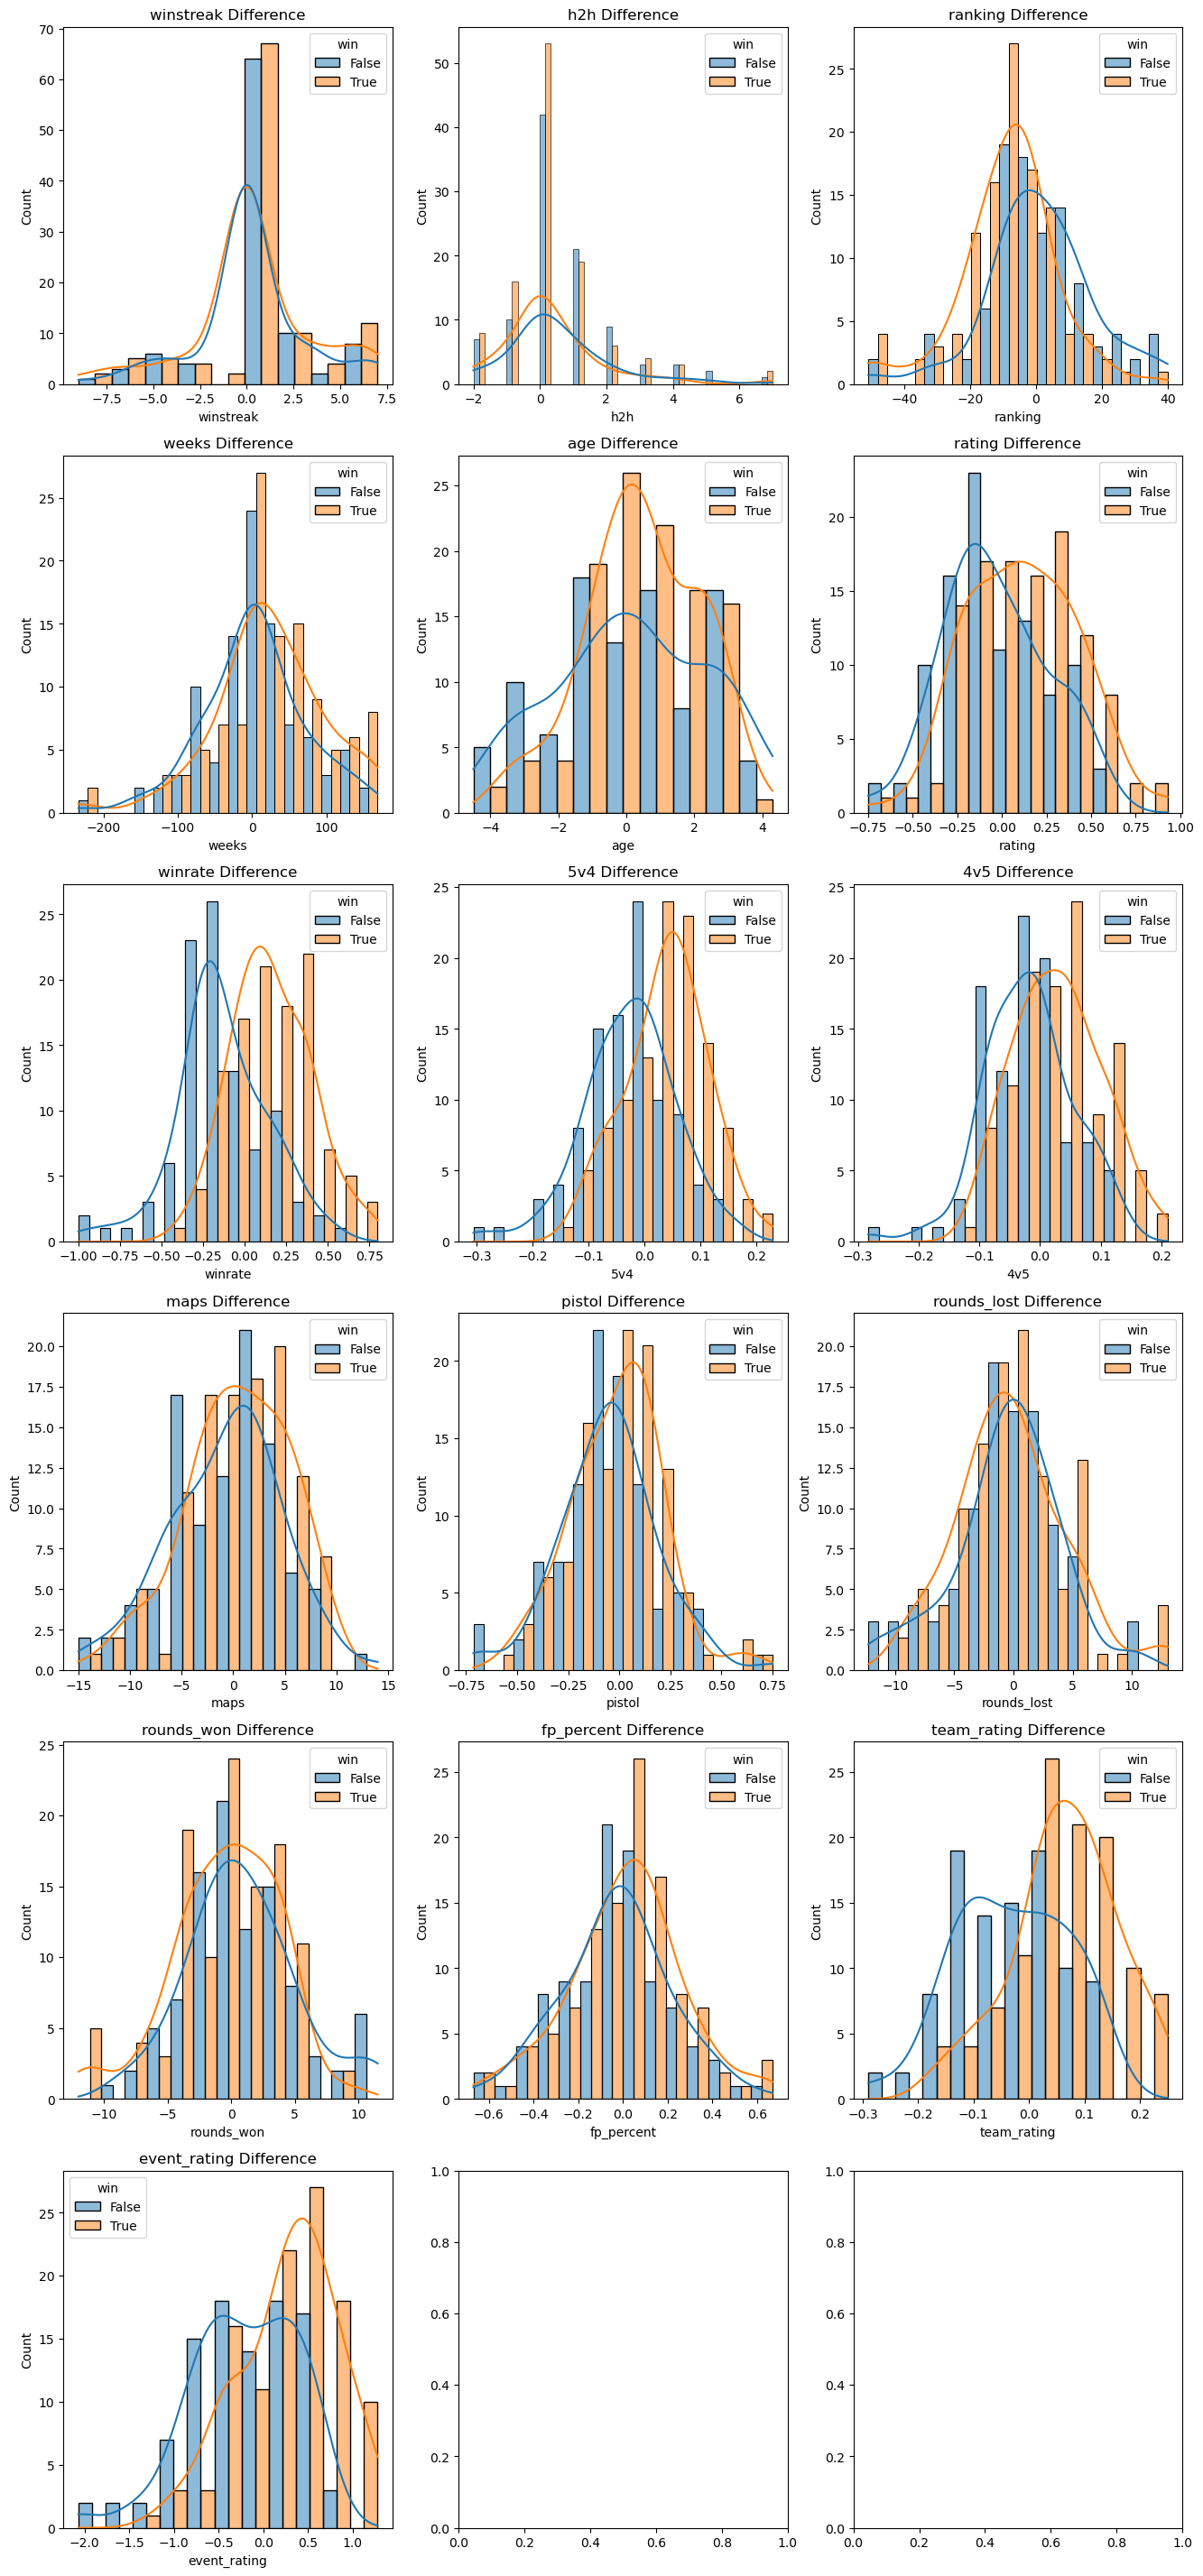

In [25]:
num_cols = 3
num_rows = math.ceil(len(da.columns)/num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))

index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        if index < len(da.columns)-1:
            sns.histplot(x = da.columns[index], hue='win', data = da, ax = axes[row,col], kde=True, multiple='dodge')
            axes[row,col].set_title(f'{da.columns[index]} Difference')
            index += 1

In [26]:
print('Correlation by first_pick')
print(df[['t1_fp', 'win']].groupby('t1_fp').mean())
print('---------------')

Correlation by first_pick
            win
t1_fp          
False  0.515337
True   0.586957
---------------


<Axes: xlabel='t1_fp', ylabel='win'>

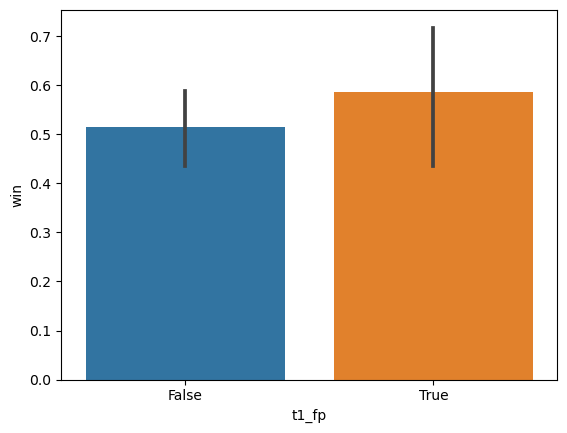

In [30]:
sns.barplot(x='t1_fp', y='win', data=df)

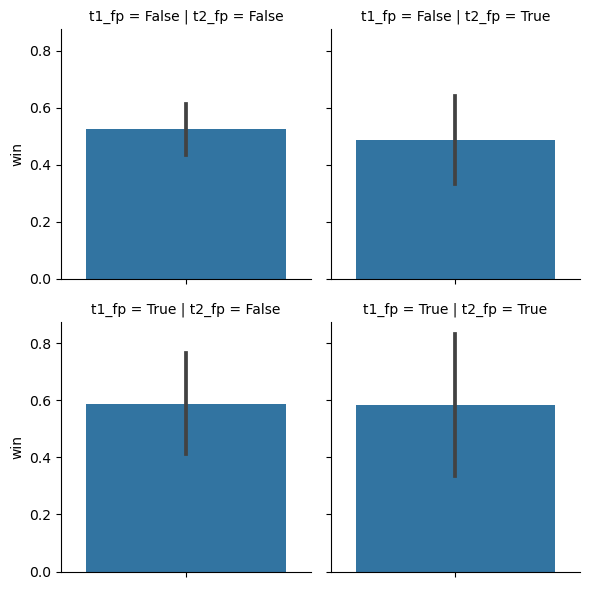

In [47]:
h = sns.FacetGrid(df, col='t2_fp', row='t1_fp')
h.map_dataframe(sns.barplot, y='win')